# CLASE 2.2: MANIPULACIÓN DE DATOS EN SERIES Y DATAFRAMES.
---

## Carga y guardado de datos en Pandas.
En general, cuando recibimos información para la posterior realización de un estudio o análisis, ésta suele venir en una gran cantidad de formatos, y que dependerán por supuesto del tipo de tarea que necesitemos realizar. La data que es objeto de análisis suele venir en un formato de tabla típico de softwares tales como Microsoft Excel® u otros, y que incluye extensiones de archivo tales como `.txt`, `.csv` o `.xlsx`. Para una gran cantidad de estas extensiones, **Pandas** nos ofrece una gran cantidad de funciones para cargar los datos contenidos en estos archivos en series o DataFrames.

Un ejemplo de función de carga de archivos en **Pandas** corresponde a `pd.read_excel()`, la que permite cargar cualquier archivo con extensión` .xlsx` típico de Microsoft Excel® en una serie o DataFrame, según sea el caso. Esta función tiene como único argumento obligatorio a `io`, que corresponde a la ruta del archivo al que queremos acceder. Otros argumentos opcionales incluyen `sheet_name`, que es el nombre de la hoja del libro de Excel® a la que queremos acceder; `engine`, que corresponde al motor de lectura de archivos que se usará para acceder al mismo (nosotros, puntualmente, usaremos uno que viene por defecto en una instalación de Anaconda®, llamado `openpyxl`; sin embargo, si por alguna razón no se encuentra instalado en nuestras dependencias, siempre podremos hacerlo nosotros mismos mediante la instrucción `pip install openpyxl`); y `decimal`, que corresponde a un string que denota el separador de decimales utilizado en el archivo (por defecto, dicho separador es `,`).

Podemos cargar el archivo `pillars_data.xlsx`, ubicado en la ruta `/seccion_02_pandas/datasets`, a fin de probar esta función:

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Carga de archivos de Excel (extensión .xlsx).
data = pd.read_excel(io="datasets/pillars_data.xlsx", engine="openpyxl")

Revisemos la geometría de este DataFrame mediante su atributo `shape` (que se hereda igualmente desde **Numpy**):

In [3]:
# Geometría de nuestro DataFrame.
data.shape

(923, 7)

Este DataFrame tiene 923 filas, así que usaremos el método `head()` para verificar sus primeras 5 filas:

In [4]:
# Imprimimos en pantalla las primeras 5 filas de nuestro DataFrame.
data.head()

,x,y,z,area,frec_fracturas,sigma_z,tiraje_prom
0,1006.1766,488.6437,2346,286.5643,1.979,11.126392,122.685
1,1040.6020,492.5178,2346,286.5643,3.070,9.646313,121.178
2,1075.0274,496.3919,2346,286.5643,3.070,10.590594,118.942
3,1109.4528,500.2660,2346,286.5643,1.750,10.605144,120.012
4,1143.8782,504.1401,2346,286.5643,0.670,10.059537,122.787


La carga de datos desde archivos con extensión `.xlsx` suele ser muy lenta. Por esa razón, es preferible cargar data desde archivos que sean de menor complejidad. Un ejemplo de este tipo de archivos corresponde a aquellos con extensión `.csv` (valores separados por comas), debido a que éstos consumen mucha menos memoria que aquellos generados por defecto en Microsoft Excel®.

Para testear la diferencia en el tiempo de carga de archivos en **Pandas** con ambos tipos de formato, primero guardaremos nuestro DataFrame en formato `.csv`. Para ello, podemos utilizar el método `to_csv()` aplicado sobre nuestro DataFrame, considerando la ruta y el nombre de archivo con el cual guardaremos esta data:

In [5]:
# Guardamos nuestra data en un archivo de valores separados por comas (.csv).
data.to_csv("datasets/pillars_data.csv")

La carga de datos desde archivos con extensión `.csv` en **Pandas** puede realizarse mediante el uso de la función `pd.read_csv()`, cuyo único argumento obligatorio es `filepath_or_buffer`, y que corresponde a la ruta del archivo desde el cual cargamos nuestros datos. Esta función también comparte varios argumentos con `pd.read_excel()`, como `decimal`, y que cumple la misma función:

In [6]:
# Volvemos a cargar nuestra data, pero esta vez desde un archivo .csv.
data = pd.read_csv(filepath_or_buffer="datasets/pillars_data.csv")

Vemos que se trata casi exactamente del mismo archivo:

In [7]:
# Esta es la misma data que antes, sólo que cargada desde un archivo más liviano.
data.head()

,Unnamed: 0,x,y,z,area,frec_fracturas,sigma_z,tiraje_prom
0,0,1006.1766,488.6437,2346,286.5643,1.979,11.126392,122.685
1,1,1040.6020,492.5178,2346,286.5643,3.070,9.646313,121.178
2,2,1075.0274,496.3919,2346,286.5643,3.070,10.590594,118.942
3,3,1109.4528,500.2660,2346,286.5643,1.750,10.605144,120.012
4,4,1143.8782,504.1401,2346,286.5643,0.670,10.059537,122.787


Observamos que el archivo cargado previamente tiene una columna adicional cuyo nombre es `"Unnamed: 0"`. La razón de aquello es porque, al guardar un DataFrame mediante el método` to_csv()`, el índice de filas asignado por defecto al mismo se guarda también. Para evitar guardar un el índice de un DataFrame junto con sus datos, basta con especificar el argumento `index` en el método `to_csv()` con valor igual a `False`.

Previo a hacer esto, primero eliminaremos la columna `"Unnamed: 0"`. Para eliminar cualquier fila o columna en un DataFrame, podemos usar siempre el método `drop()` para eliminar cualquier fila o columna, especificando para ello el eje estructural que sirve como referencia para la correspondiente eliminación (`axis=0` para las filas, y `axis=1` para las columnas, similar a lo que ocurre en arreglos bidimensionales de **Numpy**). Por supuesto, `drop()` requiere que especifiquemos el índice asociado a la fila o columna (o conjunto de filas o columnas) que deseamos eliminar. Finalmente, usamos el argumento `inplace` (que es de tipo Booleano) para indicar a **Pandas** que la eliminación se realiza sobre la serie o DataFrame en cuestión, guardando los cambios una vez que éstos se realizan. De este modo, para eliminar la columna` "Unnamed: 0"`, basta con escribir:

In [8]:
# Eliminamos la columna 'Unnamed: 0'.
data.drop("Unnamed: 0", axis=1, inplace=True)

Ahora guardamos nuestro DataFrame, ignorando el índice de filas:

In [9]:
# Guardamos nuestro DataFrame en formato .csv, descartando el índice de filas.
data.to_csv("datasets/pillars_data.csv", index=False)

Vemos que ahora, si cargamos nuestra data y la imprimimos en pantalla, no existirá la columna `"Unnamed: 0"`:

In [10]:
# Cargamos nuestra data nuevamente.
data = pd.read_csv(filepath_or_buffer="datasets/pillars_data.csv")
data.head()

,x,y,z,area,frec_fracturas,sigma_z,tiraje_prom
0,1006.1766,488.6437,2346,286.5643,1.979,11.126392,122.685
1,1040.6020,492.5178,2346,286.5643,3.070,9.646313,121.178
2,1075.0274,496.3919,2346,286.5643,3.070,10.590594,118.942
3,1109.4528,500.2660,2346,286.5643,1.750,10.605144,120.012
4,1143.8782,504.1401,2346,286.5643,0.670,10.059537,122.787


Si tomamos el tiempo de ejecución de ambas funciones de carga de archivos, veremos que la función `pd.read_csv()` es muchísimo más rápida que `pd.read_excel()` al abrir el mismo archivo con extensiones diferentes:

In [11]:
%timeit pd.read_excel(io="datasets/pillars_data.xlsx", engine="openpyxl")

61 ms ± 2.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [12]:
%timeit pd.read_csv(filepath_or_buffer="datasets/pillars_data.csv")

1.58 ms ± 16.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


¡`pd.read_csv()` fue casi 40 veces más rápida que `pd.read_excel()`, siendo que ambos archivos tenían almacenada la misma data!

## Iteraciones sobre filas.

### Algunos comentarios en relación al tiempo de ejecución.
Con iteraciones sobre filas nos referimos a cualquier cálculo repetitivo que se realice sobre todas las filas de una estructura de datos de **Pandas** (ya sea una serie o un DataFrame), una a la vez. Estas operaciones suelen tener un tiempo de ejecución lento y que motiva, de hecho, a que **Pandas** nos ofrezca una amigable advertencia en su [documentación oficial](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#iteration) relativa al hecho de que, en efecto, este es un proceso que tarda más tiempo del que quizás nos gustaría esperar. Por lo tanto, antes de proceder a iterar sobre filas, debemos detenernos a pensar en qué queremos hacer con cada una de ellas, y empaquetar dicha acción en alguna función que aplicaremos posteriormente sobre nuestra serie o DataFrame mediante el método `apply()`

Antes de proceder a explicar cómo generar iteraciones sobre filas, nos detendremos un poco a comentar cómo aplicar funciones sobre una serie o DataFrame mediante el uso del método `apply()`. Dicho método es propio de cualquiera de estas estructuras de datos, y permite aplicar cualquier función previamente definida sobre todos los datos de una serie o DataFrame, o bien, sobre los datos que están referenciados por algún eje (filas o columnas).

De la misma forma que ocurre con los arreglos bidimensionales, los DataFrames son estructuras que están ordenadas siguiendo una convención que justifica su geometría. Tal convención es exactamente la misma que la usada en **Numpy** para tales arreglos, y hace uso de los ejes 0 y 1 para hacer referencia a operaciones que aplican ya sea sobre filas o columnas, respectivamente. Esta referencia, igualmente, se explicita mediante el argumento axis, y es algo que ya vimos al usar el método `drop()`.

Los ejes que definen la geometría de un arreglo se ilustran en el esquema de la Fig. (2.1):

![alt text](https://github.com/rquezadac/udd_data_analytics_lectures/blob/main/seccion_02_pandas/figures/fig_2_1.png?raw=true "Logo Title Text 1")
<p style="text-align: center;">Fig. (2.1): Geometría típica de un DataFrame</p>

El dataset que hemos cargado en el DataFrame `data` corresponde a una base de datos donde cada fila representa un pilar del nivel de producción de una mina subterránea explotada mediante Panel Caving. Cada columna representa algún atributo importante de estos pilares: Coordenadas rectangulares $(X, Y, Z)$, área del pilar, frecuencia de fracturas (una medida de la calidad de la roca que constituye cada pilar), carga vertical sobre el pilar (eje $Z$, estado de pre-minería) y el tiraje de mineral promedio que se extrae en los puntos de extracción próximos al pilar.

El método `apply()` permite, como dijimos antes, aplicar cualquier función previamente definida a todos los elementos de nuestro DataFrame (o serie, si ese fuera el caso). Por ejemplo, si quisiéramos calcular la raíz cuadrada de cada uno de los valores de nuestro DataFrame, podemos usar la función de **Numpy** `np.sqrt()` como argumento del método `apply()`. De esta manera:

In [13]:
# Podemos usar apply() para aplicar cualquier función sobre nuestra data.
data.apply(np.sqrt).head()

,x,y,z,area,frec_fracturas,sigma_z,tiraje_prom
0,31.720287,22.105287,48.435524,16.92821,1.406769,3.335625,11.076326
1,32.258363,22.192742,48.435524,16.92821,1.752142,3.105851,11.008088
2,32.787610,22.279854,48.435524,16.92821,1.752142,3.254319,10.906053
3,33.308449,22.366627,48.435524,16.92821,1.322876,3.256554,10.954999
4,33.821268,22.453064,48.435524,16.92821,0.818535,3.171677,11.080930


Si quisiéramos obtener el promedio de todas las columnas que constituyen nuestro DataFrame (es decir, un promedio considerando los valores de todas las filas para cada columna), podemos especificar el argumento `axis=0` en el método `apply()`, tomando como input en este caso la función `np.mean()`:

In [14]:
data.apply(np.mean, axis=0)

x                 1299.028809
y                   47.767501
z                 2346.000000
area               323.079548
frec_fracturas       1.794297
sigma_z             12.878160
tiraje_prom        132.587316
dtype: float64

Cuando aplicamos una función sobre nuestro DataFrame mediante el método `apply()`, el resultado de la función aplicada correctamente al DataFrame será el resultado de dicha implementación. Naturalmente, si deseamos obtener una serie que es resultado de manipular las columnas de un DataFrame, tendremos que referenciar dicha operación con respecto a las columnas del mismo para obtener el resultado correcto. Por ejemplo:

In [15]:
# El método apply() retorna el resultado del cálculo que hagamos, y no necesariamente tendrá
# el mismo número de filas y columnas de la estructura de datos sobre la cual aplicamos este
# método.
data.apply(lambda x: 1000 * x["sigma_z"]/x["area"], axis=1)

0       38.826860
1       33.661950
2       36.957130
3       37.007904
4       35.103944
          ...    
918     64.365694
919    146.043870
920    148.089314
921    166.580850
922     66.624398
Length: 923, dtype: float64

Las funciones que aplicamos mediante el uso del método `apply()` se aplican de forma global sobre el DataFrame o serie respectivos, lo que nos ahorra tiempo. Esto es porque, si aplicáramos la misma función fila a fila, el tiempo de ejecución de dicha operación sería ostensiblemente mayor. Tomemos como referencia el tiempo de ejecución de la operación anterior:

In [16]:
# El tiempo de ejecución de una función aplicada sobre el DataFrame completo suele
# ser razonablemente bajo.
%timeit data.apply(lambda x: 1000 * x["sigma_z"]/x["area"], axis=1)

7.92 ms ± 115 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Volvamos al tema de las iteraciones sobre filas. Una forma de hacerlo es mediante el método `iterrows()`, el cual retorna un generador que progresa fila a fila, y suele ser muy lento. Por ejemplo:

In [17]:
# El método iterrows() retorna un generador por filas que es muy lento.
%timeit -n1 [row for index, row in data.iterrows()]

24 ms ± 2.08 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Cuando `iterrows()` accede a una fila, lo que éste método *ve* es algo como ésto:

In [18]:
# Así es como lee las filas el método iterrows().
for index, row in data.iterrows():
    print(row)
    break

x                 1006.176600
y                  488.643700
z                 2346.000000
area               286.564300
frec_fracturas       1.979000
sigma_z             11.126392
tiraje_prom        122.685000
Name: 0, dtype: float64


Es decir, cada fila es accesada dentro de un DataFrame y reformateada en un objeto de tipo `pd.Series`antes de hacer cualquier cálculo. Esta es una de las razones por las cuales el método `iterrows()`es extremadamente lento. Una alternativa es utilizar el método `itertuples()`el cual retorna las filas de una serie o DataFrame, pero en un formato conocido como `namedtuple`, muchísimo más eficiente que el acceso por medio de series independientes en cada fila. De hecho, este tipo de acceso es común que sea 40 veces más rápido que el que hacemos por medio de `iterrows()`:

In [19]:
# El método itertuples() es mucho más rápido que itertuples().
%timeit -n1 [row for row in data.itertuples()]

1.29 ms ± 58.2 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


Cuando `itertuples()` accede a una fila, dicho acceso es de la siguiente manera:

In [20]:
# Así es como lee las filas el método itertuples().
for row in data.itertuples():
    print(row)
    break

Pandas(Index=0, x=1006.1766, y=488.6437, z=2346, area=286.5643, frec_fracturas=1.979, sigma_z=11.126392, tiraje_prom=122.685)


Este formato de acceso es mucho más eficiente que el anterior.

### Comparativas entre accesos.
En la sección anterior (Clase 2.1), revisamos varios tipos de operaciones de selección de información que permite acceder a cualquier elemento de un DataFrame, ya sea mediante un esquema de doble corchete, o mediante el uso de métodos indexadores. Vale la pena, por tanto, detenernos a revisar los tiempos de ejecución de cada uno de estos tipos de selección:

In [21]:
%timeit -n1000 data["frec_fracturas"][0]
%timeit -n1000 data.iloc[0]["frec_fracturas"]
%timeit -n1000 data.loc[0, "frec_fracturas"]

3.99 µs ± 178 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
75.9 µs ± 5.56 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
5.3 µs ± 138 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Recordemos que los DataFrames son estructuras que están referenciadas en primera instancia con respecto a las columnas. Por lo tanto, es razonable esperar que el acceso a las columnas primero, y luego a las filas, sea mucho más rápido que acceder primero a una fila, y luego a una columna respectiva. En el bloque de código anterior, observamos que el acceso en el orden `(columna, fila)` de la primera línea es 20 veces más rápido que el acceso en el orden `(fila, columna)` de la segunda. El uso de `loc[]` ùtilizado en la tercera línea, `data.loc[0, "frec_fracturas"]`), si bien se escribe en el orden `(fila, columna)`, accede primero a la columna y luego a la fila respectiva, y es 13 veces más rápido que el acceso especificado en la segunda línea.

### Vectorización.
Vamos a hacer algunas operaciones sobre nuestro DataFrame. Una muy común es la construcción de atributos categóricos cuyo valor representa un rango para otra variable que ya es numérica. Una de las columnas en nuestro DataFrame, como podemos observar, representa la frecuencia de fracturas asociada a un conjunto de pilares, la que es una medida de la calidad de la roca que conforma cada pilar. Supongamos que se establece la siguiente clasificación para dicha calidad:

- Si $FF\leq 1.25$, entonces la roca es de buena calidad.
- Si $FF\in (1.25,2.25]$, entonces la roca es de calidad regular.
- Si $FF>2.25$, entonces la roca es de mala calidad.

Podemos crear una nueva columna en nuestro DataFrame que represente esta clasificación. Una opción natural es usar un loop de tipo `for`, con sentencias condicionales para ir generando los valores de la nueva columna conforme revisamos, fila a fila, el valor de la frecuencia de fracturas. Esta es, indudablemente, una operación que requiere de una iteración por filas. Definamos una función para hacer este trabajo:

In [22]:
# Una función para iterar por filas en nuestro DataFrame y hacer la clasificación.
def classify_rock_qa(data: pd.DataFrame) -> pd.DataFrame:
    # Definimos la nueva columna y la inicializamos con un NaN.
    data["calidad_roca"] = np.nan

    # Clasificamos los valores de la frecuencia de fracturas mediante un loop.
    for row in data.index:
        if data.loc[row, "frec_fracturas"] <= 1.25:
            data.loc[row, "calidad_roca"] = "Buena Calidad"
        elif data.loc[row, "frec_fracturas"] > 2.25:
            data.loc[row, "calidad_roca"] = "Mala Calidad"
        else:
            data.loc[row, "calidad_roca"] = "Calidad Regular"
    return data

Verifiquemos el tiempo de ejecución de esta función sobre nuestro DataFrame:

In [23]:
# Esta función es, como cabría esperar... ¡MUY LENTA!
%timeit classify_rock_qa(data)

160 ms ± 2.51 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Podemos hacer el mismo trabajo usando la función `np.where()`, la cual es una operación vectorizada de **Numpy**. Verifiquemos el tiempo de ejecución de esta alternativa:

In [24]:
# Otra alternativa es usar np.where(), que permite realizar esta operación de forma vectorizada.
def classify_rock_vec(data: pd.DataFrame) -> pd.DataFrame:
    # Definimos la nueva columna y la inicializamos con un NaN. 
    data["calidad_roca"] = np.nan

    # Aplicamos la clasificación directamente por medio de la función np.where().
    data["calidad_roca"] = np.where(
        data["frec_fracturas"] <= 1.25, 
        "Buena Calidad", 
        np.where(
            data["frec_fracturas"] > 2.25, 
            "Mala Calidad", 
            "Calidad Regular"
        )
    )
    return data

Ahora verificamos el tiempo de ejecución de esta alternativa:

In [25]:
%timeit classify_rock_vec(data)

452 µs ± 8.97 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


¡368 veces más rápido! Esta diferencia es una brutalidad. Y una razón más que suficiente para validar el hecho que ya establecimos previamente: **NO iterar sobre filas en caso de no ser REALMENTE necesario**.

Apliquemos la función vectorizada para construir esta nueva columna:

In [26]:
# Aplicamos nuestra función vectorizada para construir nuestra nueva columna.
data = classify_rock_vec(data)
data.head()

,x,y,z,area,frec_fracturas,sigma_z,tiraje_prom,calidad_roca
0,1006.1766,488.6437,2346,286.5643,1.979,11.126392,122.685,Calidad Regular
1,1040.6020,492.5178,2346,286.5643,3.070,9.646313,121.178,Mala Calidad
2,1075.0274,496.3919,2346,286.5643,3.070,10.590594,118.942,Mala Calidad
3,1109.4528,500.2660,2346,286.5643,1.750,10.605144,120.012,Calidad Regular
4,1143.8782,504.1401,2346,286.5643,0.670,10.059537,122.787,Buena Calidad


## Evaluadores.
Los evaluadores son métodos que nos permiten operar sobre los elementos de un DataFrame o serie de manera directa, evitando operar individualmente sobre cada fila. Uno de los evaluadores más importantes corresponde a `str`, y que nos permite construir funciones aplicables sobre strings con respecto a cualquier columna de un DataFrame (o directamente sobre una serie), y que nos pueden ser muy útiles cuando necesitamos procesar columnas con variables no numéricas. Un ejemplo es la columna `"calidad_roca"`, que acabamos de construir.

Podríamos usar el método `upper()`, del evaluador `str`, para transformar todos los caracteres que conforman los valores de la columna `"calidad_roca"` en mayúsculas (en contraste, el método `lower()` permite llevar todos los caracteres a minúsculas):

In [27]:
# El método str.upper() permite transformar strings en mayúsculas (de aplicarse).
data["calidad_roca"].str.upper()

0      CALIDAD REGULAR
1         MALA CALIDAD
2         MALA CALIDAD
3      CALIDAD REGULAR
4        BUENA CALIDAD
            ...       
918      BUENA CALIDAD
919      BUENA CALIDAD
920    CALIDAD REGULAR
921      BUENA CALIDAD
922       MALA CALIDAD
Name: calidad_roca, Length: 923, dtype: object

También podríamos obtener el número de caracteres que conforma cada string mediante el método `len()` en una determinada columna:

In [28]:
# El método str.len() permite obtener la longitud de los elementos de una columna.
data["calidad_roca"].str.len()

0      15
1      12
2      12
3      15
4      13
       ..
918    13
919    13
920    15
921    13
922    12
Name: calidad_roca, Length: 923, dtype: int64

El evaluador `str` puede ser una herramienta poderosa cuando queremos buscar ciertas expresiones en una columna constituida por strings. Por ejemplo, podemos buscar todos los elementos en una columna que contengan alguna expresión definida por strings:

In [29]:
# Buscamos todos los pilares que representen pilares de mala calidad.
data["calidad_roca"].str.contains("Mala")

0      False
1       True
2       True
3      False
4      False
       ...  
918    False
919    False
920    False
921    False
922     True
Name: calidad_roca, Length: 923, dtype: bool

## Exploración.
Cuando analizamos data que está contenida en una serie o en un DataFrame, es muy útil contar con herramientas que nos permitan tener claro las características inherentes a dicha data. Ejemplos de estas herramientas son métodos tales como `head()` o `tail()`, que nos permiten observar las 5 primeras o últimas columnas de una serie o un DataFrame, y que ya ejemplificamos previamente. Sin embargo, también disponemos de otros métodos tales como `info()` o `describe()`.

El método `info()` nos permite obtener una tabla que resume aspectos importantes de cada una de las columnas que constituyen un DataFrame, tales como el tipo de dato asociado a cada una de ellas, sus rótulos y la cuantía de filas que presentan data explícitamente definida (es decir, que no están definidas por valores faltantes, como `nan`):

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   x               923 non-null    float64
 1   y               923 non-null    float64
 2   z               923 non-null    int64  
 3   area            923 non-null    float64
 4   frec_fracturas  923 non-null    float64
 5   sigma_z         923 non-null    float64
 6   tiraje_prom     923 non-null    float64
 7   calidad_roca    923 non-null    object 
dtypes: float64(6), int64(1), object(1)
memory usage: 57.8+ KB


Vemos pues que, en nuestro DataFrame data, tenemos un total de 8 columnas, cuyos nombres se listan en el campo `Column`. Ninguna de estas columnas tiene valores faltantes (`nan`), todas ellas están constituidas por números de punto flotante de 64 bits, salvo `"z"`, que está conformada por números enteros, y `"calidad_roca"`, que está conformada por strings (que son representados genéricamente en **Pandas** por el tipo `object`). El DataFrame usa un espacio de memoria un poco mayor a 57.8 kB.

Por otro lado, el método `describe()` nos permite obtener una descripción estadística importante de todas las variables numéricas que conforman un DataFrame, constituida por los correspondientes promedios, desviaciones estándar, valores mínimos, valores máximos, cuantías, y cuartiles Q1, Q2 (la mediana) y Q3. Esta descripción es, en sí misma, retornada como un DataFrame:

In [31]:
data.describe()

,x,y,z,area,frec_fracturas,sigma_z,tiraje_prom
count,923.000000,923.000000,923.0,923.000000,923.000000,923.000000,923.000000
mean,1299.028809,47.767501,2346.0,323.079548,1.794297,12.878160,132.587316
std,169.513075,250.346905,0.0,60.824849,1.114504,3.352868,33.177588
min,970.139900,-492.877300,2346.0,85.475000,0.150000,7.048940,0.000000
25%,1165.587400,-146.247650,2346.0,286.564300,0.670000,10.904291,125.830000
50%,1295.000000,44.286700,2346.0,345.638600,1.270000,11.729744,133.917000
75%,1415.367900,250.959350,2346.0,347.524300,3.070000,13.176716,148.926500
max,1686.962600,523.510600,2346.0,707.425200,3.070000,29.742796,201.307000


Notemos que `describe()` ignora cualquier valor de tipo `nan`. Por eso razón, los valores de cuantía que este método retorna corresponde a valores que no son faltantes.

También disponemos de métodos para hacer cuantías de valores únicos en una columna determinada (o serie). Estos métodos resultan útiles para caracterizar variables categóricas en un conjunto de datos:

In [32]:
# El método nunique() permite determinar el número de valores únicos en una columna.
data["calidad_roca"].nunique()

3

In [33]:
# El método unique() permite listar los valores únicos de una determinada columna 
# en un arreglo de Numpy.
data["calidad_roca"].unique()

array(['Calidad Regular', 'Mala Calidad', 'Buena Calidad'], dtype=object)

In [34]:
# El método value_counts() permite obtener una serie que ordenar los valores de una
# columna por su cuantía.
data["calidad_roca"].value_counts()

Buena Calidad      458
Mala Calidad       403
Calidad Regular     62
Name: calidad_roca, dtype: int64

## Modificaciones y transformaciones.
**Pandas** también dispone de una serie de herramientas que permiten generar variadas modificaciones y transformaciones sobre los datos que están almacenados en series y DataFrames. Por ejemplo, el método `map()` permite cambiar los valores de una serie por medio de un diccionario que mapee índices con sus valores respectivos:

In [35]:
# Definimos una serie a partir de nuestro DataFrame.
col_sample = data.loc[:6, "frec_fracturas"].copy()
col_sample

0    1.979
1    3.070
2    3.070
3    1.750
4    0.670
5    1.030
6    3.070
Name: frec_fracturas, dtype: float64

In [36]:
# Podemos usar el método map() para modificar los valores de dicha serie. El mapeo se
# hace usando un esquema del tipo (valor_antiguo: valor_nuevo).
col_sample.map(
    {1.979: "reemplazo", 3.070: "otro reemplazo", 
     1.750: "y otro mas...", 0.670: "y otro...",
     1.030: "y el ultimo!"}
)

0         reemplazo
1    otro reemplazo
2    otro reemplazo
3     y otro mas...
4         y otro...
5      y el ultimo!
6    otro reemplazo
Name: frec_fracturas, dtype: object

El método `map()` exige mapear todos los valores de una serie. Los que no incluyamos derivarán en que el resultado de este método será una serie cuyos valores no modificados sean `nan`:

In [37]:
# Lo que no modifiquemos mediante map() resultará en un NaN.
col_sample.map(
    {1.979: "reemplazo", 1.750: "y otro mas...", 
     0.670: "y otro...", 1.030: "y el ultimo!"}
)

0        reemplazo
1              NaN
2              NaN
3    y otro mas...
4        y otro...
5     y el ultimo!
6              NaN
Name: frec_fracturas, dtype: object

Por otro lado, el método `assign()` permite asignar columnas nuevas en un DataFrame, definiendo siempre cómo se genera dicha columna (por ejemplo, mediante una función):

In [38]:
# Creamos un DataFrame para probar el método assign().
df = pd.DataFrame(
    data=np.array([[0.2, 1.2, 3.3], [0.4, 7.8, 2.2], [4.1, 5.7, 1.3]]),
    index=[f"row_{i}" for i in range(3)],
    columns=[f"col_{j}" for j in range(3)]
)

In [39]:
df

,col_0,col_1,col_2
row_0,0.2,1.2,3.3
row_1,0.4,7.8,2.2
row_2,4.1,5.7,1.3


In [40]:
# El método assign() permite asignar columnas nuevas a un DataFrame.
df.assign(col_3=lambda x: x["col_0"]*1.2 + 0.3*x["col_1"]**2 - 0.06*x["col_2"]**3)

,col_0,col_1,col_2,col_3
row_0,0.2,1.2,3.3,-1.48422
row_1,0.4,7.8,2.2,18.09312
row_2,4.1,5.7,1.3,14.53518


In [41]:
# Podemos agregar más de una columna mediante el método assign().
df.assign(
    col_3=lambda x: np.sqrt(x["col_0"] + x["col_1"] + x["col_2"]),
    col_4=lambda x: x["col_0"]**2 - x["col_1"] + np.log(x["col_3"]),
    col_5=lambda x: [f"foo_{k}" for k in df.index]
)

,col_0,col_1,col_2,col_3,col_4,col_5
row_0,0.2,1.2,3.3,2.167948,-0.386219,foo_row_0
row_1,0.4,7.8,2.2,3.224903,-6.469097,foo_row_1
row_2,4.1,5.7,1.3,3.331666,12.313473,foo_row_2


### Agrupamiento mediante `groupby()`
Una de las operaciones más importantes que se pueden realizar sobre los DataFrames corresponde a los agrupamientos conforme ciertas categorías. En términos generales, el agrupamiento permite obtener ciertos valores representativos para determinados grupos de variables. Para ello, **Pandas** nos provee del método `groupby()`, el cual retorna un objeto que permite generar tales valores. Por ejemplo, para el caso del DataFrame data, podemos usar el método `groupby()` para obtener los valores medios de esfuerzo vertical (`"sigma_z"`), área (`"area"`), tiraje circulante (`"tiraje_prom"`) y frecuencia de fracturas (`"frec_fracturas"`) conforme los distintos tipos de roca que constituyen cada pilar. Para ello, una vez hecho el agrupamiento, aplicamos el método `mean()` para calcular estos promedios (ya profundizaremos en algunos métodos aplicables al análisis estadístico un poco más adelante):

In [42]:
# El método groupby() permite agrupar valores conforme categorías.
data.groupby("calidad_roca").mean()[['sigma_z', 'area', 'tiraje_prom', 'frec_fracturas']]

,sigma_z,area,tiraje_prom,frec_fracturas
calidad_roca,,,,
Buena Calidad,13.552295,331.530377,124.446603,0.735853
Calidad Regular,12.355339,323.597392,140.767855,1.751776
Mala Calidad,12.192455,313.395712,140.580501,3.003736


### Agregaciones mediante `pd.pivot_table()`.
Una de las agregaciones más familiares en un contexto ingenieril corresponde a la **tabla dinámica**, que es una opción que es muy utilizada en softwares como Microsoft Excel®. **Pandas** igualmente nos provee de una función que permite construir tablas dinámicas, considerando cualquier función que permita construir agregaciones (por ejemplo, sumas, multiplicaciones, medias, medianas, mínimos, máximos, etc.). Tal función es `pd.pivot_table()`:

In [43]:
# La función pd.pivot_table() permite construir tablas dinámicas a partir de un DataFrame, siempre que
# dispongamos de una columna con valores categóricos que posibilite esta agrupación.
pd.pivot_table(
    data=data, index="calidad_roca", 
    values=['sigma_z', 'area', 'tiraje_prom', 'frec_fracturas'],
    aggfunc=np.mean
)

,area,frec_fracturas,sigma_z,tiraje_prom
calidad_roca,,,,
Buena Calidad,331.530377,0.735853,13.552295,124.446603
Calidad Regular,323.597392,1.751776,12.355339,140.767855
Mala Calidad,313.395712,3.003736,12.192455,140.580501


Vemos que, en la función `pd.pivot_table()`, disponemos de los siguientes argumentos: `data` para definir el DataFrame a partir del cual construimos la tabla dinámica;` index` para definir la variable desde la cual agrupamos información para visualizarla en la tabla dinámica; `values` para listar las columnas que se visualizarán en la tabla dinámica; y `aggfunc` para definir la función de agregación a utilizar en la tabla dinámica.

Podemos usar cualquier tipo de función de agregación:

In [44]:
# Tabla dinámica con agregaciones conforme valores máximos.
pd.pivot_table(
    data=data, index="calidad_roca", 
    values=['sigma_z', 'area', 'tiraje_prom', 'frec_fracturas'],
    aggfunc=np.max
)

,area,frec_fracturas,sigma_z,tiraje_prom
calidad_roca,,,,
Buena Calidad,707.4252,1.225,29.742796,201.307
Calidad Regular,559.2209,2.250,25.615528,193.471
Mala Calidad,662.9659,3.070,27.146460,192.489


In [45]:
# Tabla dinámica con agregaciones conforme medianas.
pd.pivot_table(
    data=data, index="calidad_roca", 
    values=['sigma_z', 'area', 'tiraje_prom', 'frec_fracturas'],
    aggfunc=np.median
)

,area,frec_fracturas,sigma_z,tiraje_prom
calidad_roca,,,,
Buena Calidad,346.74145,0.6700,12.383410,131.3165
Calidad Regular,337.26905,1.7375,11.419470,134.0185
Mala Calidad,327.88290,3.0700,11.560717,138.9340


Es posible construir agregaciones horizontales e incluso conforme más de una categoría. Construyamos una nueva variable con strings en nuestro DataFrame para probar esta opción. De este modo, supongamos que, conforme al tiraje existente en los puntos extracción aledaños a cada pilar, se define que todo pilar con menos de 25 t de tiraje no se considera en producción, un tiraje mayor o igual que 150 t se considera con alta producción circulante, y un pilar con tiraje entre 25 y 150 t se considera con baja producción circulante. Podemos usar la función `np.where()` para generar dicha clasificación:

In [46]:
# Nueva clasificación conforme tiraje.
data["estado"] = np.where(
    data["tiraje_prom"] <= 25,
    "sin prod",
    np.where(
        data["tiraje_prom"] >= 150,
        "alta prod",
        "baja prod"
    )
)

Esta nueva columna tiene la siguiente distribución de valores:

In [47]:
data["estado"].value_counts()

baja prod    662
alta prod    219
sin prod      42
Name: estado, dtype: int64

Para construir una tabla dinámica con más de una categoría, usamos el argumento `columns` para definir la categoría adicional (en este caso, `"estado"`). Sumamos además el argumento `margins` (con valor Booleano `True`) para mostrar el resultado de las agregaciones horizontales conforme la función de agregación definida mediante el argumento `aggfunc`:

In [48]:
# Construimos la tabla dinámica y la asignamos a una variable.
pivot_data = pd.pivot_table(
    data=data, index="calidad_roca", 
    values=['sigma_z', 'area'],
    aggfunc=np.mean, columns="estado", margins=True
)

In [49]:
# Mostramos la tabla redondeando los decimales a sólo uno (por motivos de presentación).
round(pivot_data, 1)

area                             sigma_z            \
estado          alta prod baja prod sin prod    All alta prod baja prod   
calidad_roca                                                              
Buena Calidad       352.6     327.3    317.0  331.5      15.6      12.4   
Calidad Regular     331.4     320.6      NaN  323.6      14.3      11.6   
Mala Calidad        326.0     308.7      NaN  313.4      12.4      12.1   
All                 337.7     318.6    317.0  323.1      13.9      12.2   

                                
estado          sin prod   All  
calidad_roca                    
Buena Calidad       17.9  13.6  
Calidad Regular      NaN  12.4  
Mala Calidad         NaN  12.2  
All                 17.9  12.9

Observamos que, cuando no es posible hacer el agrupamiento, la posición de la tabla dinámica en la cual debía retornarse dicho agrupamiento se rellena con un `nan`.

## Ordenamiento de DataFrames.
Cualquier estructura de datos de **Pandas** (series o DataFrames) puede ordenarse conforme el valor de sus índices, siendo dicho orden del tipo lexicográfico (considerando números u otros caracteres). Para ello, podemos utilizar el método `sort_index()`, el cual, por defecto, generará el correspondiente ordenamiento considerando los índices de filas en orden ascendente. El tipo de ordenamiento (ascendente o descendente) se controla mediante el argumento Booleano `ascending`:

In [50]:
# Creamos un DataFrame para probar los métodos de ordenamiento. Dicho DataFrame estará compuesto
# por ciertos aspectos asociados a algunos trabajadores en una empresa minera.
workers_data = pd.DataFrame(
    data=np.array([
        ["Alvarado Michael", 2391, "mina", 38, True],
        ["Salgado Josefa", 1556, "planta", 31, True],
        ["Martínez Luís", 8722, "mantenimiento", 52, False],
        ["Orellana Marta", 9042, "mina", 44, False],
        ["Castillo Leonor", 13058, "servicios", 32, False],
        ["Galleguillos Alberto", 12292, "planta", 33, False],
        ["Zapata Esteban", 2317, "mantenimiento", 28, True],
    ]),
    index=[13889, 14364, 10987, 10056, 14887, 15474, 16645],
    columns=["Trabajador", "Horas sin accidentes", "Gerencia", "Edad", "Indicador accidentes"]
)

In [51]:
# Definimos el nombre del índice de filas.
workers_data.index.name = "ID"

In [52]:
# Mostramos en pantalla este DataFrame.
workers_data

,Trabajador,Horas sin accidentes,Gerencia,Edad,Indicador accidentes
ID,,,,,
13889,Alvarado Michael,2391,mina,38,True
14364,Salgado Josefa,1556,planta,31,True
10987,Martínez Luís,8722,mantenimiento,52,False
10056,Orellana Marta,9042,mina,44,False
14887,Castillo Leonor,13058,servicios,32,False
15474,Galleguillos Alberto,12292,planta,33,False
16645,Zapata Esteban,2317,mantenimiento,28,True


In [53]:
# Ordenamos este DataFrame conforme los índices de fila de manera ascendente.
workers_data.sort_index(ascending=True)

,Trabajador,Horas sin accidentes,Gerencia,Edad,Indicador accidentes
ID,,,,,
10056,Orellana Marta,9042,mina,44,False
10987,Martínez Luís,8722,mantenimiento,52,False
13889,Alvarado Michael,2391,mina,38,True
14364,Salgado Josefa,1556,planta,31,True
14887,Castillo Leonor,13058,servicios,32,False
15474,Galleguillos Alberto,12292,planta,33,False
16645,Zapata Esteban,2317,mantenimiento,28,True


Por supuesto, para ordenar un DataFrame conforme sus índices en forma descendente, bastará con setear el argumento `ascending=False`.

También es posible ordenar un DataFrame conforme los valores de cualquiera de sus columnas. Para ello, podemos utilizar el método `sort_values()`, usando el argumento by para indicar el rótulo de columna que definirá la referencia desde la cual haremos el ordenamiento:

In [54]:
# Ordenamos este DataFrame conforme los nombres de cada trabajador.
workers_data.sort_values(by="Trabajador")

,Trabajador,Horas sin accidentes,Gerencia,Edad,Indicador accidentes
ID,,,,,
13889,Alvarado Michael,2391,mina,38,True
14887,Castillo Leonor,13058,servicios,32,False
15474,Galleguillos Alberto,12292,planta,33,False
10987,Martínez Luís,8722,mantenimiento,52,False
10056,Orellana Marta,9042,mina,44,False
14364,Salgado Josefa,1556,planta,31,True
16645,Zapata Esteban,2317,mantenimiento,28,True


Cualquiera de los métodos de ordenamiento anteriores sólo devuelve copias del DataFrame sobre el cual los aplicamos. Para realizar la modificación desde la misma implementación del método, como sabemos, seteamos el argumento `inplace=True`.

## Setting de índices en DataFrames.
Cualquier DataFrame puede indexarse conforme cualquiera de sus columnas. Para definir una columna que pasará a ser el índice de un DataFrame, podemos usar el método `set_index()`, usando el argumento `keys` para especificar el rótulo de la columna que será el nuevo índice de filas de nuestro DataFrame. Para que estos cambios surtan efecto inmediatamente, podemos setear el argumento `inplace=True`:

In [55]:
# Creamos una nueva columna identificadora de pilares, con la cual indexaremos nuestro
# DataFrame.
data["id"] = np.arange(start=1, stop=data.shape[0]+1, step=1)

In [56]:
# Usamos esta nueva columna para indexar el DataFrame mediante el método set_index().
data.set_index(keys="id", inplace=True)
data.head()

,x,y,z,area,frec_fracturas,sigma_z,tiraje_prom,calidad_roca,estado
id,,,,,,,,,
1,1006.1766,488.6437,2346,286.5643,1.979,11.126392,122.685,Calidad Regular,baja prod
2,1040.6020,492.5178,2346,286.5643,3.070,9.646313,121.178,Mala Calidad,baja prod
3,1075.0274,496.3919,2346,286.5643,3.070,10.590594,118.942,Mala Calidad,baja prod
4,1109.4528,500.2660,2346,286.5643,1.750,10.605144,120.012,Calidad Regular,baja prod
5,1143.8782,504.1401,2346,286.5643,0.670,10.059537,122.787,Buena Calidad,baja prod


Por supuesto, siempre podemos reiniciar el índice de un DataFrame y generar uno por defecto mediante el método `reset_index()`. Podemos usar el argumento `drop`, que es Booleano, para indicar si deseamos recuperar el índice antiguo, dejándolo como columna en nuestro DataFrame:

In [57]:
# Reseteamos el índice de nuestro DataFrame, descartando el anterior.
data.reset_index(drop=True, inplace=True)
data.head()

,x,y,z,area,frec_fracturas,sigma_z,tiraje_prom,calidad_roca,estado
0,1006.1766,488.6437,2346,286.5643,1.979,11.126392,122.685,Calidad Regular,baja prod
1,1040.6020,492.5178,2346,286.5643,3.070,9.646313,121.178,Mala Calidad,baja prod
2,1075.0274,496.3919,2346,286.5643,3.070,10.590594,118.942,Mala Calidad,baja prod
3,1109.4528,500.2660,2346,286.5643,1.750,10.605144,120.012,Calidad Regular,baja prod
4,1143.8782,504.1401,2346,286.5643,0.670,10.059537,122.787,Buena Calidad,baja prod


## Eliminación de índices duplicados.
Un aspecto importante de la estructuración de datos en una serie o DataFrame corresponde al aseguramiento de que no existan filas o columnas rotuladas con el mismo índice. Es decir, no queremos que existan índices duplicados en ninguna dimensión.

Podemos abordar este problema desde varias aristas. Por ejemplo, podríamos renombrar los índices que se encuentran duplicados. Sin embargo, debido a que los índices son objetos inmutables, esta forma de abordar el problema puede resultar un tanto impráctica. Por lo tanto, suele ser mucho más sencillo deshacernos de todas aquellas filas o columnas con índices duplicados.

Para ilustrar cómo hacerlo, primero construiremos un DataFrame con índices e filas y columnas duplicados:

In [58]:
# Construimos un DataFrame con índices de fila duplicados.
rng = np.random.default_rng(42)

df = pd.DataFrame(
    data=rng.random(size=(6, 6)),
    index=["a", "b", "c", "a", "d", "d"],
    columns=["p", "p", "r", "s", "s", "t"]
)

In [59]:
# Mostramos el DataFrame en pantalla.
df

,p,p,r,s,s,t
a,0.773956,0.438878,0.858598,0.697368,0.094177,0.975622
b,0.761140,0.786064,0.128114,0.450386,0.370798,0.926765
c,0.643865,0.822762,0.443414,0.227239,0.554585,0.063817
a,0.827631,0.631664,0.758088,0.354526,0.970698,0.893121
d,0.778383,0.194639,0.466721,0.043804,0.154289,0.683049
d,0.744762,0.967510,0.325825,0.370460,0.469556,0.189471


Recordemos que los atributos `index` y `columns` nos permiten recuperar el índice de filas y columnas, respectivamente, de un DataFrame:

In [60]:
# Índice de filas de nuestro DataFrame.
df.index

Index(['a', 'b', 'c', 'a', 'd', 'd'], dtype='object')

In [61]:
# Índice de columnas de nuestro DataFrame.
df.columns

Index(['p', 'p', 'r', 's', 's', 't'], dtype='object')

Sobre cualquiera de estos atributos podemos aplicar el método `duplicated()`, el cual nos permite obtener un arreglo Booleano que determinará todas aquellas posiciones, ya sea de filas o columnas, que se encuentren duplicadas con respecto al valor correspondiente del índice:

In [62]:
# El método duplicated(), aplicado sobre el atributo index, nos devuelve un arreglo
# Booleano que muestra que índices están duplicados con respecto a las filas anteriores.
df.index.duplicated()

array([False, False, False,  True, False,  True])

Es posible conservar cualquiera de los índices duplicados y eliminar el o los demás, usando el argumento `keep`, a fin de especificar con cuál de estos índices nos quedamos, aunque limitados al primero o último de ellos.

In [63]:
df.index.duplicated(keep="first")

array([False, False, False,  True, False,  True])

In [64]:
df.index.duplicated(keep="last")

array([ True, False, False, False,  True, False])

Cualquier de estos arreglos puede ser utilizado como máscara para generar una selección de información en función de la existencia de duplicados. Por ejemplo, si optamos por conservar siempre el primer índice en un conjunto de índices duplicados, podemos generar una selección complementaria a partir del resultado de la detección de estos duplicados usando el operador `~`, que nos permite seleccionar todo lo que no se corresponda con la máscara correspondiente:

In [65]:
# Podemos eliminar las filas con índices duplicados, usando masking mediante cualquiera
# de las selecciones anteriores.
df.loc[~df.index.duplicated(keep='first')]

,p,p,r,s,s,t
a,0.773956,0.438878,0.858598,0.697368,0.094177,0.975622
b,0.761140,0.786064,0.128114,0.450386,0.370798,0.926765
c,0.643865,0.822762,0.443414,0.227239,0.554585,0.063817
d,0.778383,0.194639,0.466721,0.043804,0.154289,0.683049


Podemos hacer lo mismo para las columnas, usando en este caso el atributo `columns` previo al método `duplicated()`:

In [66]:
# También podemos eliminar duplicados por columnas.
df.loc[:, ~df.columns.duplicated(keep='first')]

,p,r,s,t
a,0.773956,0.858598,0.697368,0.975622
b,0.761140,0.128114,0.450386,0.926765
c,0.643865,0.443414,0.227239,0.063817
a,0.827631,0.758088,0.354526,0.893121
d,0.778383,0.466721,0.043804,0.683049
d,0.744762,0.325825,0.370460,0.189471


Podemos eliminar duplicados en ambas dimensiones combinando las máscaras anteriores:

In [67]:
# O eliminar duplicados en ambos ejes de una sola vez.
df.loc[~df.index.duplicated(keep='first'), ~df.columns.duplicated(keep='first')]

,p,r,s,t
a,0.773956,0.858598,0.697368,0.975622
b,0.761140,0.128114,0.450386,0.926765
c,0.643865,0.443414,0.227239,0.063817
d,0.778383,0.466721,0.043804,0.683049


## Cálculo de estadígrafos.
Todos los métodos comentados con anterioridad permiten manipular eficientemente datos almacenados en estructuras de datos de **Pandas**. Sin embargo, vale la pena detenernos en ciertos métodos y funciones aptas para la realización de análisis estadísticos sobre nuestra data. **Pandas** nos provee de una serie de métodos que permiten extraer estadígrafos importantes relativos a nuestra data y, además, tanto series como DataFrames son compatibles con la gran mayoría de las funciones universales de **Numpy**.

Partimos construyendo un DataFrame con el cual empezaremos a ejemplificar estos métodos:

In [68]:
# Construimos un DataFrame para hacer un análisis estadístico.
rng = np.random.default_rng(7) # Semilla aleatoria fija.

In [69]:
# Toneladas de cobre diarias transportadas a una planta de chancado en un año.
x1 = rng.normal(loc=85000, scale=12550, size=365).reshape(-1, 1)

# Ley de mineral diaria.
x2 = rng.normal(loc=0.48, scale=0.1, size=365).reshape(-1, 1) + 0.28

# Recuperación asociada.
x3 = rng.normal(loc=87, scale=5, size=365).reshape(-1, 1)

In [70]:
# Definimos el DataFrame.
prod_df = pd.DataFrame(
    data=np.concatenate([x1, x2, x3], axis=1),
    columns=["ton", "ley_cut", "recup"]
)

In [71]:
prod_df.head()

,ton,ley_cut,recup
0,85015.438425,0.798796,80.965478
1,88749.256496,0.565332,84.490627
2,81559.569915,0.619097,87.398240
3,73823.072424,0.845464,76.989064
4,79293.881646,0.830624,88.712377


Lo métodos `mean()` y `median()` nos permiten calcular la media y la mediana de cualquier sub-estructura de un DataFrame, sea ésta una fila o una columna (serie), dependiendo de la referencia establecida en el método con el argumento `axis`:

In [72]:
# Media de todas las columnas del DataFrame.
prod_df.mean(axis=0)

ton        83771.831991
ley_cut        0.749340
recup         86.833451
dtype: float64

In [73]:
# Mediana de todas las columnas del DataFrame.
prod_df.median(axis=0)

ton        84174.148430
ley_cut        0.748855
recup         86.655622
dtype: float64

Por otro lado, el método `std()` permite obtener la desviación estándar de cualquier subestructura de datos de un DataFrame:

In [74]:
# Desviación estándar de todas las columnas del DataFrame.
prod_df.std(axis=0)

ton        11532.083933
ley_cut        0.096164
recup          4.872555
dtype: float64

Además, el método `quantile()` nos permite obtener percentiles para nuestro DataFrame o serie. Para ello, basta con especificar el argumento `q`, el cual acepta cualquier número entre 0 y 1, y que representa el percentil respectivo a obtener a partir de nuestros datos. De esta manera, si deseamos obtener el percentil 0.25 (primer cuartil, o Q1), bastará con escribir:

In [75]:
# Percentil 0.25 (o Q1) por columna de nuestro DataFrame.
prod_df.quantile(q=0.25, axis=0)

ton        76576.023136
ley_cut        0.683369
recup         83.636640
Name: 0.25, dtype: float64

Por supuesto, si queremos construir una tabla con varios percentiles, bastará con imputar una lista con todos ellos en el mismo argumento `q`. De esta manera, si ponemos `quantile(q=[0.25, 0.50, 0.75], axis=0)`, obtendremos como resultado un DataFrame con los percentiles Q1, Q2 y Q3, respectivamente (25%, 50%, 75%):

In [76]:
# Tabla de percentiles Q1, Q2 y Q3.
prod_df.quantile(q=[0.25, 0.50, 0.75], axis=0)

,ton,ley_cut,recup
0.25,76576.023136,0.683369,83.636640
0.50,84174.148430,0.748855,86.655622
0.75,91358.925668,0.814320,90.257026


**Ejemplo 2.1 - Eliminación de outliers en un conjunto de datos:** Una aplicación directa de los métodos que hemos aprendido en este apartado corresponde a la eliminación de outliers en un conjunto de datos. Con *outliers* nos referimos a todos aquellos valores en dicho conjunto que difieren significativamente del resto de las observaciones. En general, un outlier puede deberse a variabilidades en ciertas mediciones asociadas a la obtención de un dato determinado, errores experimentales, o que la distribución inherente a los datos observados es de colas muy pesadas. Sea cual sea el caso, es normal ocuparse de eliminar estos outliers previo a la realización de un análisis global del conjunto de datos, a fin de que éstos no afecten la generalización de los resultados del análisis a datos nuevos.

Un procedimiento común para eliminar outliers en un conjunto de datos corresponde a la remoción de toda observación, columna a columna, que esté fuera de la región central de su correspondiente distribución observada, donde tal región central se define en función de un múltiplo de la correspondiente desviación estándar en torno a la media. Esto suele ser especialmente aplicable en datos que se distribuyen de manera aproximdamente simétrica con respecto a la media. Por ejemplo, data normalmente distribuida. En este caso, podemos proceder eliminando toda la data exterior a determinados percentiles (por ejemplo, 5% y 95%).

Partamos creando un DataFrame con data normalmente distribuida:

In [77]:
# Creamos nuestro DataFrame.
data = pd.DataFrame(
    data=rng.normal(loc=1500, scale=560, size=(1000, 4)),
    columns=[f"var_{j}" for j in range(1, 5)]
)

In [78]:
data.head()

,var_1,var_2,var_3,var_4
0,1695.471510,1119.060876,2642.338937,2793.139483
1,681.021012,1669.005178,2905.036884,1938.983232
2,1623.793680,1383.488173,1196.931200,1380.991767
3,1191.591529,1917.148681,1277.033954,1252.955153
4,826.790015,1472.229670,999.291863,1398.779906


Es posible reconocer gráficamente los outliers en nuestra mediante la construcción de un diagrama de cajas (comúnmente conocido como boxplot). Para cualquier DataFrame, es posible generar dicho gráfico por medio del método `plot()`, usando el argumento `kind="box"`:

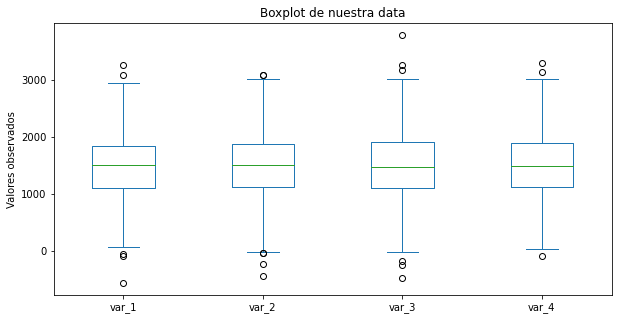

In [79]:
data.plot(
    kind="box", figsize=(10, 5), title="Boxplot de nuestra data",
    ylabel="Valores observados"
);

Observamos que, en este gráfico, las cajas respectivas están limitadas inferior y superiormente los percentiles Q1 (25%) y Q3 (75%), respectivamente. La línea que está trazada al interior de cada caja representa a la mediana de la distribución observada (el percentil Q2). Los outliers se muestran como puntos que están muy alejados de cada caja, como se observa en el gráfico para cada una de las variables de este DataFrame.

A fin de eliminar los outliers fuera de la región definida por un conjunto de percentiles, podemos calcular el rango intercuartil, que se define como la diferencia entre dichos percentiles. Si optamos por eliminar cualquier dato fuera de la región limitada por los percentiles Q1 y Q3, bastará con escribir:

In [80]:
# Cálculo del rango intercuartil.
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)

iqr = q3 - q1

Definiremos como *outlier* a cualquier dato observado que esté fuera de la región definida como 1.5 veces el rango intercuartil. Por lo tanto, podemos construir el siguiente filtro para seleccionar únicamente los datos interiores a dicha región:

In [81]:
# Removemos los outliers así definidos.
data_filtered = data[~((data < (q1 - 1.5*iqr)) | (data > (q3 + 1.5*iqr))).any(axis=1)]

En el filtro anterior, el método `any()` permite aplicar el filtro sobre cualquiera de las columnas que cumpla con la condición establecida para la eliminación de outliers (mediante el argumento `axis=1`).

Si ahora construimos un boxplot para la data sin outliers, veremos ue ya no hay ningún dato fuera de las correspondientes cajas:

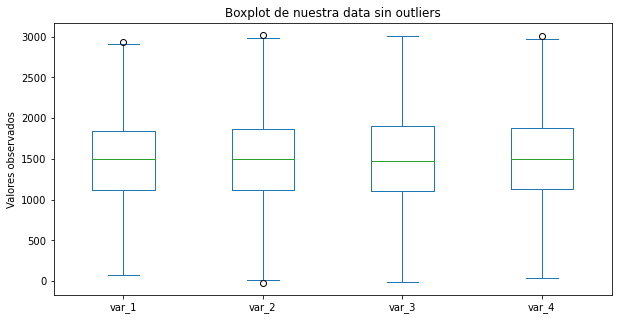

In [82]:
data_filtered.plot(
    kind="box", figsize=(10, 5), title="Boxplot de nuestra data sin outliers",
    ylabel="Valores observados"
);

También podemos calcular fácilmente la cantidad de datos que hemos eliminado por medio de este filtro:

In [83]:
data.shape[0] - data_filtered.shape[0]

20

Un total de 35 outliers eliminados de las 1000 observaciones originales. ◼︎

**Ejemplo 2.2 - Matriz de correlación:** La realización de análisis de datos muestreados a partir de un proceso o sistema usualmente requiere conocer si tales datos están correlacionados de alguna manera. De la estadística, sabemos que, dadas $n$ observaciones relativas a las variables aleatorias $(X_{i},X_{j})$, indexadas por los valores $k=1,2,..., n$, podemos calcular el coeficiente de correlación muestral $r_{ij}$ como

<p style="text-align: center;">$r_{ij}:=\displaystyle \frac{\displaystyle \sum\nolimits^{n}_{k=1} \left( x_{ik}-\bar{x_{i}} \right)  \left( x_{jk}-\bar{x}_{j} \right)  }{\left( n-1\right)  s_{i}s_{j}} =\displaystyle \frac{n\displaystyle \sum\nolimits^{n}_{k=1} x_{ik}x_{jk}-\displaystyle \sum\nolimits^{n}_{k=1} x_{ik}\displaystyle \sum\nolimits^{n}_{k=1} x_{jk}}{\sqrt{n\displaystyle \sum\nolimits^{n}_{k=1} x^{2}_{ik}-\left( \displaystyle \sum\nolimits^{n}_{k=1} x_{ik}\right)^{2}  } \sqrt{n\displaystyle \sum\nolimits^{n}_{k=1} x^{2}_{jk}-\left( \displaystyle \sum\nolimits^{n}_{k=1} x_{jk}\right)^{2}  } } $</p>
</p> <p style="text-align: right;">$(2.1)$</p>

Donde $x_{i}$ y $x_{j}$ son las realizaciones de las variables aleatorias $X_{i}$ y $X_{j}$, respectivamente. Por otro lado, $s_{i}$ y $s_{j}$ son las desviaciones estándar de las correspondientes observaciones y $\bar{x}_{i}$ y $\bar{x}_{j}$ son sus medias respectivas.

Para un conjunto de datos compuesto por una serie de variables o atributos que, en primera instancia, podemos agrupar todos los valores de correlación para cada uno de los posibles pares de variables en dicho conjunto en una matriz. Tal matriz, llamada **matriz de correlación** (denotada como $\mathbf{R}$), permite entender rápidamente si existe cierto nivel de codependencia lineal entre cada par de variables en un determinado conjunto de datos, conforme las observaciones que constituyen esta muestra:

<p style="text-align: center;">$\mathbf{R} :=\displaystyle \left( \begin{matrix}\displaystyle \frac{\displaystyle \sum\nolimits^{n}_{k=1} \left( x_{1k}-\bar{x_{1}} \right)  \left( x_{1k}-\bar{x}_{1} \right)  }{\left( n-1\right)  s_{1}s_{1}} &\displaystyle \frac{\displaystyle \sum\nolimits^{n}_{k=1} \left( x_{1k}-\bar{x_{1}} \right)  \left( x_{2k}-\bar{x}_{2} \right)  }{\left( n-1\right)  s_{1}s_{2}} &\cdots &\displaystyle \frac{\displaystyle \sum\nolimits^{n}_{k=1} \left( x_{1k}-\bar{x_{1}} \right)  \left( x_{nk}-\bar{x}_{n} \right)  }{\left( n-1\right)  s_{1}s_{n}} \\ \displaystyle \frac{\displaystyle \sum\nolimits^{n}_{k=1} \left( x_{2k}-\bar{x_{2}} \right)  \left( x_{1k}-\bar{x}_{1} \right)  }{\left( n-1\right)  s_{2}s_{1}} &\displaystyle \frac{\displaystyle \sum\nolimits^{n}_{k=1} \left( x_{2k}-\bar{x_{2}} \right)  \left( x_{2k}-\bar{x}_{2} \right)  }{\left( n-1\right)  s_{2}s_{2}} &\cdots &\displaystyle \frac{\displaystyle \sum\nolimits^{n}_{k=1} \left( x_{2k}-\bar{x_{2}} \right)  \left( x_{nk}-\bar{x}_{n} \right)  }{\left( n-1\right)  s_{2}s_{n}} \\ \vdots &\vdots &\ddots &\vdots \\ \displaystyle \frac{\displaystyle \sum\nolimits^{n}_{k=1} \left( x_{nk}-\bar{x_{n}} \right)  \left( x_{1k}-\bar{x}_{1} \right)  }{\left( n-1\right)  s_{n}s_{1}} &\displaystyle \frac{\displaystyle \sum\nolimits^{n}_{k=1} \left( x_{nk}-\bar{x_{n}} \right)  \left( x_{2k}-\bar{x}_{2} \right)  }{\left( n-1\right)  s_{n}s_{2}} &\cdots &\displaystyle \frac{\displaystyle \sum\nolimits^{n}_{k=1} \left( x_{nk}-\bar{x_{n}} \right)  \left( x_{nk}-\bar{x}_{n} \right)  }{\left( n-1\right)  s_{n}s_{n}} \end{matrix} \right)  =\left( \begin{matrix}1&r_{12}&\cdots &r_{1n}\\ r_{21}&1&\cdots &r_{2n}\\ \vdots &\vdots &\ddots &\vdots \\ r_{n1}&r_{n2}&\cdots &1\end{matrix} \right)  $</p>
</p> <p style="text-align: right;">$(2.2)$</p>

Si bien su cálculo manual puede resultar un verdadero problema, dada la extensión de la fórmula (2.2), **Pandas** nos ofrece una forma sencilla de realizarlo mediante el uso del método `corr()`, aplicable sobre cualquier DataFrame:

In [84]:
# Construimos un DataFrame a partir de data aleatoria para verificar las correlaciones resultantes.
X = pd.DataFrame(
    data=rng.normal(loc=1250, scale=680, size=(1000, 10)),
    columns=[f"X{j}" for j in range(1, 11)]
)

In [85]:
# Mostramos las primeras 5 filas de este DataFrame en pantalla.
X.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,1643.533368,314.426929,1674.826775,2115.182639,678.969899,1405.387446,508.355358,1608.167769,1323.445650,1409.874868
1,2192.272034,1583.649177,2178.484985,1694.435690,447.449690,1440.948870,1596.041051,280.162906,2169.962815,1309.426841
2,1513.455437,653.528940,1312.500688,1467.040636,1041.280266,1317.960967,-178.213625,2189.220945,505.378109,-220.935797
3,609.881453,695.178765,1632.563657,641.409918,1456.033594,610.206672,2763.400350,1633.370584,2592.719473,572.526745
4,1713.653738,612.020835,1655.498022,1723.071708,177.635191,488.865158,468.442261,238.883592,764.086290,608.033917


In [86]:
# Calculamos la correspondiente matriz de correlación.
corr_matrix = X.corr()
np.around(corr_matrix, 4)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
X1,1.0000,0.0150,0.0076,0.0631,-0.0380,-0.0290,0.0407,-0.0468,-0.0207,-0.0065
X2,0.0150,1.0000,0.0030,-0.0026,-0.0051,-0.0319,0.0429,-0.0184,-0.0301,0.0247
X3,0.0076,0.0030,1.0000,-0.0437,0.0347,0.0272,0.0691,-0.0308,-0.0246,-0.0377
X4,0.0631,-0.0026,-0.0437,1.0000,-0.0001,-0.0438,0.0316,0.0588,0.0014,0.0046
X5,-0.0380,-0.0051,0.0347,-0.0001,1.0000,0.0196,0.0360,0.0046,-0.0446,-0.0481
X6,-0.0290,-0.0319,0.0272,-0.0438,0.0196,1.0000,-0.0002,0.0252,-0.0374,0.0481
X7,0.0407,0.0429,0.0691,0.0316,0.0360,-0.0002,1.0000,0.0094,0.0633,0.0104
X8,-0.0468,-0.0184,-0.0308,0.0588,0.0046,0.0252,0.0094,1.0000,-0.0231,0.0151
X9,-0.0207,-0.0301,-0.0246,0.0014,-0.0446,-0.0374,0.0633,-0.0231,1.0000,-0.0215
X10,-0.0065,0.0247,-0.0377,0.0046,-0.0481,0.0481,0.0104,0.0151,-0.0215,1.0000


Notemos que, efectivamente, la diagonal principal de esta matriz está conformada únicamente por 1s,. debido a que cualquier variable correlacionada consigo mismo tiene un coeficiente de correlación igual a 1.

En general, es buena idea contar con una representación gráfica de esta matriz a fin de poder entender rápidamente los niveles de codependencia lineal entre pares de variables en un conjunto de datos, siendo una visualización idónea en este caso un mapa de color. No daremos muchos detalles en relación a la construcción de un gráfico de este tipo, ya que lo estudiaremos en profundidad más adelante, pero sí es bueno conocer cómo será la sintaxis para la construcción de este tipo de visualizaciones. En este caso, haremos uso conjunto de las librerías **Matplotlib** y **Seaborn**:

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

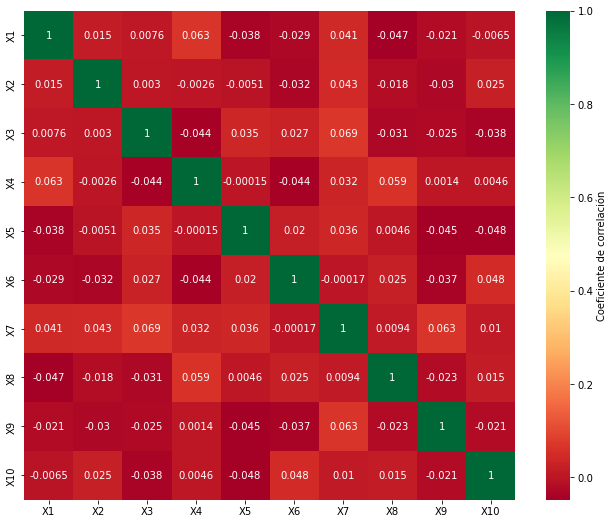

In [88]:
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(
    corr_matrix, cbar=True, cmap="RdYlGn", 
    cbar_kws={"label": "Coeficiente de correlación"}, 
    ax=ax, annot=True
);

Podemos observar que la mayoría de las variables presentan bajos valores de correlación entre sí. Este es un resultado razonable, puesto que el generador de números aleatorios de **Numpy** genera observaciones que son independientes de otras si éstas se encuentran ordenadas en un arreglo bidimensional. ◼︎

## Manejo de entradas vacías (`nan`).
La data con la cual trabajamos en el *mundo real* rara vez es limpia u homogénea. En general, una enorme cantidad de conjuntos interesantes de datos presentan una fracción importante de observaciones en las cuales no existe ningún dato. Para hacer las cosas aún peor, cuando solemos integrar distintas fuentes de datos, puede llegar a ser común que parte de esa data se pierda de alguna manera.

Vamos a discutir algunas consideraciones generales en el tratamiento de estos registros faltantes y cómo **Pandas** *elige* representar tales registros. Mostraremos también algunas herramientas de **Pandas** que nos ayudan a manejar este tipo de observaciones. Recordemos pues que los registros en los cuales no hay data se codifican mediante el valor `nan`, que significa *not a number*.

Existen varios esquemas de trabajo a la hora de enfrentarnos a la presencia de registros vacíos en un DataFrame. Generalmente, tales estrategias guardan relación con dos importantes consideraciones: Usar una máscara Booleana que indique la presencia de data faltante a nivel global, o escoger un *valor centinela* que indique un registro faltante.

En el enfoque de enmascaramiento, dicha máscara puede ser un arreglo Booleano completamente separado, o puede involucrar la apropiación de un bit en la representación de la data para indicar, localmente, el estado vacío o faltante de un valor determinado.

En el enfoque de valores centinela, dicho valor centinela podría corresponder a una convención específica para nuestros datos. Por ejemplo, podríamos escoger a -9999 para representar enteros faltantes en una tabla de datos. Podría ser una convención de carácter más global, como por ejemplo, indicar un registro de punto flotante vacío como `nan`, como lo hemos venido haciendo.

Ninguno de los enfoques anteriores puede usarse sin algún costo: El uso de una máscara separada requiere la locación de un arreglo Booleano adicional, lo que añade una carga tanto en la complejidad de los cálculos que eventualmente hagamos como en el almacenamiento. Un valor centinela reduce el rango de valores válidos que pueden ser representados, y puede requerir de lógicas adicionales (no necesariamente optimizada) de tipo aritmética para cualquier procesador de información del que dispongamos (ya sea CPU o GPU). Valores especiales tales como `nan`, además, no están siempre disponibles para otros tipos de dato, e incluso otras librerías podrían *no saber* trabajar con estas convenciones.

### El caso de Numpy.
La forma en la cual **Pandas** se hace cargo de la data faltante se limita a su dependencia de la librería **Numpy**, la que no tiene una noción nativa de valores faltantes (`nan`) para tipos de datos que no sean de punto flotante. Esto significa que cualquier arreglo en **Numpy** que contenga uno o más valores iguales a `nan` soporta operaciones aritméticas llevadas a cabo en código compilado. Sin embargo, debemos tener en consideración que `nan` es un bit que actúa como un virus, ya que infecta cualquier objeto que toque: Para cualquier operación aritmética, el resultado al usar un `nan` como argumento es otro `nan`:

In [89]:
# Si un arreglo tiene valores iguales a nan, éste se codificará automáticamente con un tipo
# de dato de punto flotante (np.float64).
a = np.array([1, np.nan, 3, 4, 5 , np.nan, np.nan, 8])
a.dtype

dtype('float64')

In [90]:
# Cualquier operación aplicada sobre los elementos de un arreglo con nan, dará como resultado
# otro nan.
print(a.sum())
print(a.prod())
print(a.mean())

nan
nan
nan


Aunque **Numpy** suele tener versiones *a prueba de `nan`* de sus funciones de agregación:

In [91]:
print(np.nansum(a))
print(np.nanprod(a))
print(np.nanmean(a))

21.0
480.0
4.2


### El caso de Pandas.
Los valores de tipo `nan` tienen su propio lugar en **Pandas**:

In [92]:
s = pd.Series(data=a, index=["a", "b", "c", "d", "e", "f", "g", "h"])
s

a    1.0
b    NaN
c    3.0
d    4.0
e    5.0
f    NaN
g    NaN
h    8.0
dtype: float64

Sin embargo, en series y DataFrames, los valores codificados como `nan` no imposibilitan las operaciones aritméticas que deseemos realizar:

In [93]:
print(s.sum())
print(s.prod())
print(s.mean())

21.0
480.0
4.2


### Operaciones aptas para el manejo de `nan`.
Como hemos visto previamente, **Pandas** usa el valor `nan` a fin de indicar la presencia de data faltante. Además, no existe ningún problema en la realización de operaciones arimtéticas sobre series o DataFrames que tengan observaciones codificadas como `nan`, ya que en este caso dichos valores no implica que su presencia en operaciones aritméticas dé como resultado otro `nan`. Sin embargo, muchas veces estaremos interesados en darle un tratamiento especial a estas observaciones que no contienen algún dato, y por tanto **Pandas** dispone de un conjunto de métodos muy útiles para detectar, remover y reemplazar valores faltantes en series y DataFrames. A saber:

- `pd.isnull()` o `pd.isna()`: Funciones que retornan una serie o DataFrame, con el mismo juego de índices que el original, y con valores Booleanos que indican la presencia de `nan`.
- `pd.notnull()` o `pd.notna()`: Funciones que retornan una serie o DataFrame, con el mismo juego de índices que el original, y con valores Booleanos que indican que el elemento respectivo no es un `nan`. En esencia, estas funciones hacen lo opuesto a `pd.isnull()` o `pd.isna()`.
- `dropna()`: Método que retorna una versión filtrada (sin `nan`) de la data. Podemos generar modificaciones de manera inmediata en la serie o DataFrame correspondiente mediante el uso del argumento `inplace=True`.
- `fillna()`: Método que retorna una versión de la data con los `nan` reemplazados por otros valores. Podemos generar modificaciones de manera inmediata en la serie o DataFrame correspondiente mediante el uso del argumento `inplace=True`.

**a) Detección de `nan`:** **Pandas** dispone de dos funciones para detectar data faltante: `pd.isnull()` y `pd.isna()`. Cada uno de estos métodos retorna una máscara Booleana sobre la data y tienen idéntico uso. Por ejemplo:

In [94]:
# Detección de nan.
pd.isnull(s)

a    False
b     True
c    False
d    False
e    False
f     True
g     True
h    False
dtype: bool

In [95]:
# La función pd.isna() hace exactamente el mismo trabajo.
pd.isna(s)

a    False
b     True
c    False
d    False
e    False
f     True
g     True
h    False
dtype: bool

Por otro lado, la función `pd.notnull()` permite identificar qué valores en una serie o DataFrame no son `nan`. Retorna una estructura con los mismos índices que `pd.isnull()`, pero con los correspondientes valores Booleanos intercambiados:

In [96]:
# La función pd.notnull() hace exactamente lo contrario que pd.isnull().
pd.notnull(s)

a     True
b    False
c     True
d     True
e     True
f    False
g    False
h     True
dtype: bool

In [97]:
# La función pd.notna() es equivalente a pd.notnull().
pd.notna(s)

a     True
b    False
c     True
d     True
e     True
f    False
g    False
h     True
dtype: bool

Debido a que el resultado de estas funciones son máscaras Booleanas, es posible utilizarlas para generar selecciones sobre cualquier serie o DataFrame correspondiente, tanto de data que no es `nan`, como de aquella que sí lo es:

In [98]:
# Seleccionamos toda la data que sea válida en nuestra serie.
s[pd.notnull(s)]

a    1.0
c    3.0
d    4.0
e    5.0
h    8.0
dtype: float64

**b) Eliminación de `nan`:** En adición a la detección de `nan` comentada previamente, es posible además eliminar data de tipo `nan` mediante el método `dropna()`, o bien, reemplazarla por otros valores, con el método `fillna()`. Por ejemplo, para el caso de nuestra serie, podemos retornar la misma, pero sin `nan`, como sigue:

In [99]:
# El método dropna() nos permite eliminar data faltante.
s.dropna()

a    1.0
c    3.0
d    4.0
e    5.0
h    8.0
dtype: float64

Para el caso de los DataFrames, existen más opciones. Consideremos el siguiente ejemplo:

In [100]:
# Creamos un DataFrame para explorar otras opciones.
S = pd.DataFrame(
    data=np.array([
        [3, np.nan, -1, 2, np.nan],
        [np.nan, 0, -2, 5, np.nan],
        [0, -6, 2, 2, 3],
        [np.nan, -1, 8, 5, 0]
    ]),
    index=[f"row_{i}" for i in range(4)],
    columns=[f"col_{j}" for j in range(5)]
)

In [101]:
# Mostramos nuestro DataFrame en pantalla.
S

,col_0,col_1,col_2,col_3,col_4
row_0,3.0,NaN,-1.0,2.0,NaN
row_1,NaN,0.0,-2.0,5.0,NaN
row_2,0.0,-6.0,2.0,2.0,3.0
row_3,NaN,-1.0,8.0,5.0,0.0


No es posible eliminar elementos individuales en un DataFrame. La aplicación del método `dropna()` sobre él resultará en la remoción de filas o columnas completas. Dependiendo de las necesidades que tengamos, podríamos querer remover una o la otra. De esta manera, se tiene que, si no especificamos ningún argumento, `dropna()` eliminará todas las filas que contengan `nan`:

In [102]:
# Con ésto, sólo nos quedará una única fila.
S.dropna()

,col_0,col_1,col_2,col_3,col_4
row_2,0.0,-6.0,2.0,2.0,3.0


Por otro lado, si especificamos mediante el argumento `axis` sobre cuál eje realizar la eliminación de `nan`, éstos serán removidos tomando como referencia filas o columnas según sea el caso. Por defecto, `dropna()` elimina toda fila que contenga `nan` (es decir, el valor por defecto de `axis` es igual a 0). Pero podemos eliminar columnas con `nan` poniendo `axis=1`:

In [103]:
# Por defecto, dropna() genera eliminaciones de filas (axis=0).
S.dropna(axis=0)

,col_0,col_1,col_2,col_3,col_4
row_2,0.0,-6.0,2.0,2.0,3.0


In [104]:
# Pero también podemos remover columnas con data faltante.
S.dropna(axis=1)

,col_2,col_3
row_0,-1.0,2.0
row_1,-2.0,5.0
row_2,2.0,2.0
row_3,8.0,5.0


Cualquier de las alternativas anteriores también resulta en la eliminación de `nan`, pero también de data de buena calidad. En vez de ello, podríamos estar más interesados en eliminar filas o columnas que agrupen la mayor cantidad de valores faltantes, lo que puede especificarse mediante los parámetros `how` y `thresh`, los cuales controlan el número de `nan` que se pueden eliminar.

La opción por defecto es `how="any"`, y es tal que cualquier columna o fila que tenga `nan` en alguno de sus elementos será eliminada (dependiendo por supuesto del argumento `axis`). También podemos setear `how="all"`, lo que permitirá la remoción de filas o columnas para las cuales todos sus elementos sean `nan`:

In [105]:
# Asignamos una columna llena de data faltante a nuestro DataFrame.
S["col_5"] = np.nan
S

,col_0,col_1,col_2,col_3,col_4,col_5
row_0,3.0,NaN,-1.0,2.0,NaN,NaN
row_1,NaN,0.0,-2.0,5.0,NaN,NaN
row_2,0.0,-6.0,2.0,2.0,3.0,NaN
row_3,NaN,-1.0,8.0,5.0,0.0,NaN


In [106]:
# Eliminamos cualquier columna que esté únicamente compuesta por nan.
S.dropna(axis=1, how="all")

,col_0,col_1,col_2,col_3,col_4
row_0,3.0,NaN,-1.0,2.0,NaN
row_1,NaN,0.0,-2.0,5.0,NaN
row_2,0.0,-6.0,2.0,2.0,3.0
row_3,NaN,-1.0,8.0,5.0,0.0


Para un mayor control de cuanta data eliminamos, podemos utilizar el argumento `thresh`, el cual nos permite indicar el mínimo valor de valores que no sean `nan` que queremos mantener por fila o columna (según el valor del argumento `axis`):

In [107]:
# Eliminamos todas las filas que tengan nan de nuestro DataFrame, pero preservamos aquellas
# que tengan al menos 4 elementos que no sean nan en ellas.
S.dropna(axis=0, thresh=4)

,col_0,col_1,col_2,col_3,col_4,col_5
row_2,0.0,-6.0,2.0,2.0,3.0,NaN
row_3,NaN,-1.0,8.0,5.0,0.0,NaN


**c) Reemplazo de `nan` por otros valores:** Con frecuencia, en vez de eliminar filas o columnas de un DataFrame con `nan`, es preferible reemplazarla con otros valores. Dicho valor podría ser cero, o algún tipo de imputación o interpolación a partir de los valores reales existentes en nuestra estructura de datos. Para ello, **Pandas** nos provee del método `fillna()`, el cual retorna una copia de la serie o DataFrame respectivos, con los `nan` reemplazados conforme nuestro requerimiento, usando el argumento `value`:

In [108]:
# Reemplazamos todos los nan con ceros en nuestro DataFrame.
S.fillna(value=0)

,col_0,col_1,col_2,col_3,col_4,col_5
row_0,3.0,0.0,-1.0,2.0,0.0,0.0
row_1,0.0,0.0,-2.0,5.0,0.0,0.0
row_2,0.0,-6.0,2.0,2.0,3.0,0.0
row_3,0.0,-1.0,8.0,5.0,0.0,0.0


En ocasiones, podría ser necesario reemplazar los `nan` con la data correspondiente al valor en la fila inmediatamente anterior. Esto puede resultar especialmente útil al trabajar con series de tiempo (lo que ya abordaremos más adelante). Tal estrategia de imputación se conoce en la práctica como *forward fill*, ya que llenado de `nan` se realiza siempre *hacia adelante*. Para ello, hacemos uso del argumento `method`, con el valor `ffill`:

In [109]:
# Imputación de nan usando una estrategia de tipo forward fill.
S.fillna(method="ffill")

,col_0,col_1,col_2,col_3,col_4,col_5
row_0,3.0,NaN,-1.0,2.0,NaN,NaN
row_1,3.0,0.0,-2.0,5.0,NaN,NaN
row_2,0.0,-6.0,2.0,2.0,3.0,NaN
row_3,0.0,-1.0,8.0,5.0,0.0,NaN


También existe una estrategia de tipo *backward fill*, la que llena los `nan` con los valores de la fila inmediatamente posterior. Para implementarla, bastará con usar el argumento `method="bfill"`:

In [110]:
# Imputación de nan usando una estrategia de tipo backward fill.
S.fillna(method="bfill")

,col_0,col_1,col_2,col_3,col_4,col_5
row_0,3.0,0.0,-1.0,2.0,3.0,NaN
row_1,0.0,0.0,-2.0,5.0,3.0,NaN
row_2,0.0,-6.0,2.0,2.0,3.0,NaN
row_3,NaN,-1.0,8.0,5.0,0.0,NaN


### Interpolaciones.
Es posible generar imputaciones sobre data faltante mediante el uso de recursos más sofisticados como es el caso de la **interpolación**, la que a su vez se define como la obtención de nuevos puntos partiendo del conocimiento de un conjunto de puntos determinado. En general, es frecuente disponer de un cierto número de puntos obtenidos por muestreo o a partir de un determinado experimento y querer construir una función que los ajuste. Es en estos casos donde la interpolación de un conjunto de datos puede resultar fundamental.

**a) Interpolación lineal:** El caso más simple de interpolación corresponde al lineal. Dados un par de puntos $P_{0}=(x_{0},y_{0})$ y $P_{1}=(x_{1},y_{1})$, podemos estimar cualquier punto entre $P_{0}$ y $P_{1}$ asumiendo que éstos pasan por una recta. En este caso, estamos interesados en construir una recta que pasa por los puntos $P_{0}$ y $P_{1}$ y cuya pendiente se obtiene a partir de dichos puntos mediante la ecuación

<p style="text-align: center;">$m=\displaystyle \frac{y_{1}-y_{0}}{x_{1}-x_{0}} =\displaystyle \frac{\triangle y}{\triangle x} $</p>
</p> <p style="text-align: right;">$(2.3)$</p>

Debido a que la pendiente de una recta es la misma en toda su extensión, se tiene que la relación (2.3) se mantiene para cualquier punto $P=(x,y)$ que pase por la recta. Por esta razón, la ecuación de la recta es

<p style="text-align: center;">$\displaystyle \frac{y_{1}-y_{0}}{x_{1}-x_{0}} =\displaystyle \frac{y-y_{0}}{x-x_{0}} \  \Longleftrightarrow \  y=y_{0}\left(\displaystyle \frac{x_{1}-x}{x_{1}-x_{0}} \right)  +y_{1}\left(\displaystyle \frac{x-x_{0}}{x_{1}-x_{0}} \right)  $</p>
</p> <p style="text-align: right;">$(2.4)$</p>

La interpretación geométrica relativa a una interpolación del tipo lineal se iluestra en la Fig. (2.2).

<p style="text-align: center;"><img src="figures/fig_2_2.png" width="500"></p>
<p style="text-align: center;">Fig. (2.4): Interpretación geométrica de una interpolación lineal</p>

En **Pandas**, cuando disponemos de un DataFrame que tiene registros con `nan`, podemos rellenar la data faltante mediante interpolaciones de tipo lineal. Para ejemplificar aquello, construiremos un DataFrame con 100 filas y 2 columnas, a partir de la semilla aleatoria (`rng`) que definimos unas líneas atrás:

In [111]:
# Creamos nuestro DataFrame.
data = pd.DataFrame(
    data=rng.normal(loc=1500, scale=560, size=(150, 2)),
    columns=[f"X_{j}" for j in range(1, 3)]
)

In [112]:
data.head()

,X_1,X_2
0,1832.204355,2108.494548
1,2022.805999,1466.305882
2,1265.653059,1097.765175
3,1958.248297,1997.699421
4,2067.057119,1325.221997


Usemos el método `plot()` para tener una idea de la variación que tienen estas variables en cada observación, suponiendo que éstas se encuentran ordenadas:

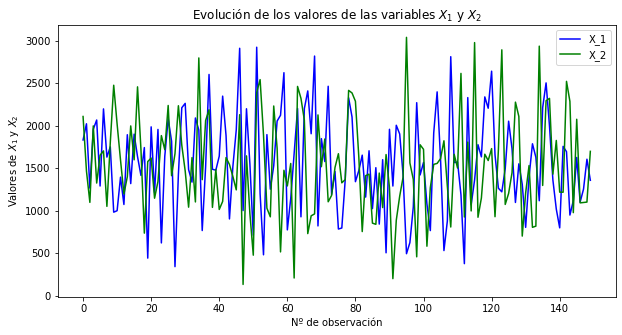

In [113]:
# Gráfico de nuestras variables.
data.plot(
    figsize=(10, 5), xlabel="Nº de observación", ylabel=r"Valores de $X_1$ y $X_2$",
    title=r"Evolución de los valores de las variables $X_1$ y $X_2$", color=["b", "g"]
);

Vamos a escoger 20 puntos al azar de este DataFrame a fin de covertirlos en `nan`, con distintas elecciones para cada columna. Para ello, generaremos una lista a partir del método `integers()` desde dos semillas aleatorias distintas. Notemos que usamos el método `tolist()` para transformar el arreglo de **Numpy** resultante en una lista:

In [114]:
# Semillas aleatorias.
rng1 = np.random.default_rng(7)
rng2 = np.random.default_rng(8)

In [115]:
# Índices a transforman en nan.
idx1 = rng1.integers(low=data.index[0], high=data.index[-1], size=20).tolist()
idx2 = rng2.integers(low=data.index[0], high=data.index[-1], size=20).tolist()

In [116]:
# Copiamos nuestra data en otro DataFrame, para preservar el original.
df = data.copy()

In [117]:
# Asignamos nan a estas posiciones.
df.loc[idx1, "X_1"] = np.nan
df.loc[idx2, "X_2"] = np.nan

El efecto de estos `nan` se observa fácilmente a nivel gráfico:

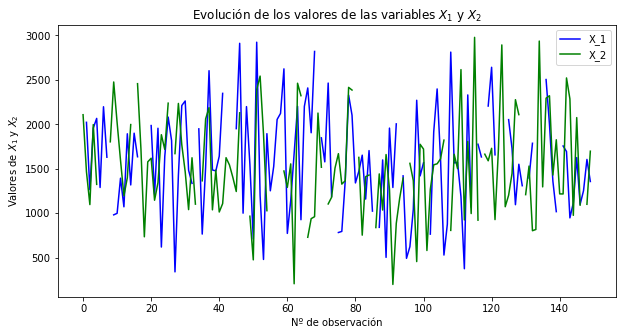

In [118]:
# Gráfico de nuestras variables (esta vez con nan).
df.plot(
    figsize=(10, 5), xlabel="Nº de observación", ylabel=r"Valores de $X_1$ y $X_2$",
    title=r"Evolución de los valores de las variables $X_1$ y $X_2$", color=["b", "g"]
);

Para construir una interpolación lineal sobre cada columna, a fin de reemplazar los `nan` en cada columna, podemos usar el método `interpolate()`, imputando en este caso el argumento `method="linear"`, a fin de indicarle a **Pandas** que la interpolación a realizar es de tipo lineal, y que es es la opción por defecto de este método. Para interpolar en la dirección de columnas, imputamos además el argumento `axis=0`:

In [119]:
# Interpolación lineal.
df_linear_interp = df.interpolate(method="linear", axis=0)

Comparemos los gráficos de ambas variables, original e inteprolada linearmente:

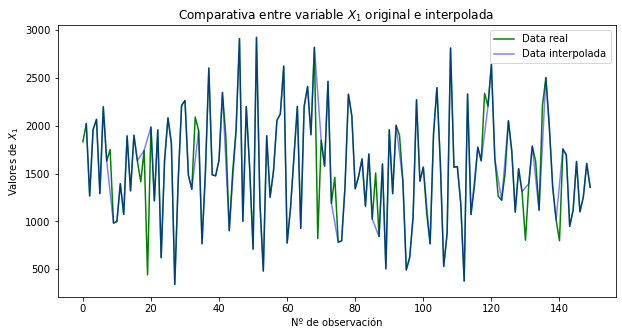

In [120]:
# Comparamos ambas variables.
data["X_1"].plot(color="green")
df_linear_interp["X_1"].plot(
    figsize=(10, 5), xlabel="Nº de observación", ylabel=r"Valores de $X_1$",
    title=r"Comparativa entre variable $X_1$ original e interpolada", color="blue",
    alpha=0.5
)
plt.legend(["Data real", "Data interpolada"]);

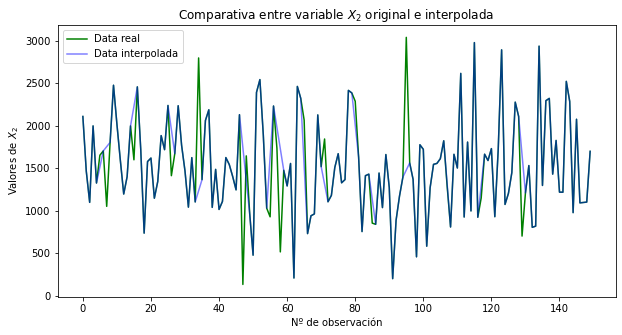

In [121]:
data["X_2"].plot(color="green")
df_linear_interp["X_2"].plot(
    figsize=(10, 5), xlabel="Nº de observación", ylabel=r"Valores de $X_2$",
    title=r"Comparativa entre variable $X_2$ original e interpolada", color="blue",
    alpha=0.5
)
plt.legend(["Data real", "Data interpolada"]);

Vemos que, en ambas variables, la interpolación lineal cumplió con imputar data en las posiciones de los `nan`. Sin embargo, no todos los valores interpolados cumplen con ser muy representativos de la data original. Esto es razonable, y es un costo que debemos estar dispuestos a pagar si tomamos la decisión de construir imputaciones de este tipo.

**b) Interpolación segmentaria o por splines:** La inteprolación lineal implementada previamente es válida para cualquier secuencia de observaciones, digamos $x_{i-1,j}$, $x_{i,j}$ e $x_{i+1,j}$, en la cual $x_{i,j}$ no está definida (es decir, es un `nan`). Por esa razón, en estricto rigor, la interpolación que realizamos fue para cada tripleta de observaciones como la anterior, en la cual la segunda de ellas es un `nan`. A esta técnica se le conoce como **interpolación segmentaria o por splines**, ya que lo que hemos construido son diversos segmentos lineales que unen puntos entre los cuales hay una observación cuyo valor es desconocido (`nan`). Tales segmentos son denominados *splines* y, por extensión, la interpolación realizada previamente fue mediante el uso de splines lineales.

Por supuesto, los splines pueden no ser lineales. Una de las técnicas de interpolación más eficientes en el análisis numérico corresponde a la interpolación mediante splines cúbicos. En este caso, cada uno de los segmentos que unen dos puntos entre los cuales hay otro punto que deseamos estimar, corresponde a un polinomio cúbico.

Consideremos pues una secuencia de puntos $\Omega =\left\{ P_{0},...,P_{n}\right\}$, donde cada punto $P_{k}$, para $k=1,2,...,n-1$, se puede escribir como $P_{k}=(x_{k},y_{k})$. Para todo $x\in [x_{k},x_{k+1}]$, se define el **spline cúbico** (o spline de orden 3) $S_{k}(x)$ como

<p style="text-align: center;">$S_{k}\left( x\right)  =a_{k}+b_{k}\left( x-x_{k}\right)  +c_{k}\left( x-x_{k}\right)^{2}  +d_{k}\left( x-x_{k}\right)^{3}  $</p>
</p> <p style="text-align: right;">$(2.5)$</p>

Y es tal que $S_{k}(x)=y_{k}$.

Naturalmente, no queremos que *cualquier* polinomio cúbico sea utilizado para representar el spline $S_{k}(x)$, sino que estamos interesados en que dicho spline cumpla con ciertas condiciones. Por ejemplo, queremos que, además de que se cumpla la condición natural de interpolación ($S_{k}(x)=y_{k}$), que la curva completa descrita por la combinación de splines en dos puntos consecutivos sea regular; es decir, que no presente discontinuidades de ningún tipo (de salto o por existencia de vértices). Para que esta condición se cumpla, basta que tanto los splines que unen dos pares consecutivos de puntos como sus derivadas tengan el mismo valor en el punto de unión. Es decir, se debe tener que $S_{k-1}(x_{k})=S_{k}(x_{k})$ y $S'_{k-1}(x_{k})=S'_{k}(x_{k})$. Finalmente, queremos que dos splines consecutivos tengan exactamente la misma curvatura. Por lo tanto, la última restricción a considerar es $S''_{k-1}(x_{k})=S''_{k}(x_{k})$.

Existen un par de **condiciones de borde** asociadas al problema de la interpolación mediante splines cúbicos que, tal y como su nombre lo indica, se aplican sobre los puntos inicial y final del conjunto completo, y dependen por completo de lo que nosotros necesitemos. La más común de estas condiciones se conoce como **condición de spline natural**, y es tal que $S''(x_{0})=0$ y $S''(x_{n})=0$.

En **Pandas** es posible implementar una interpolación por splines cúbicos usando igualmente el método `interpolate()`, imputando los argumentos `method="spline"` y `order=3`:

In [122]:
# Interpolación mediante splines cúbicos.
df_cubic_spline_interp = df.interpolate(method="spline", order=3, axis=0)

Nuevamente comparamos ambas variables, la real y la inteprolada mediante splines cúbicos (y la interpolada mediante splines lineales igualmente):

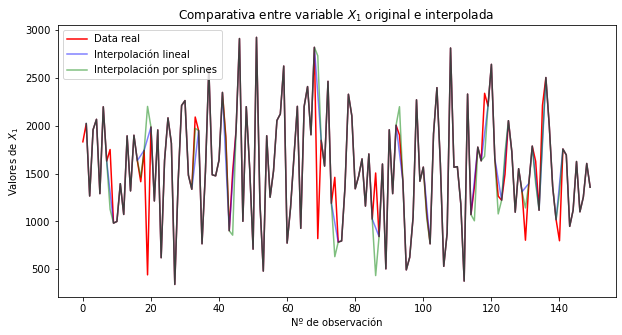

In [123]:
data["X_1"].plot(color="red")
df_linear_interp["X_1"].plot(
    figsize=(10, 5), xlabel="Nº de observación", ylabel=r"Valores de $X_1$",
    title=r"Comparativa entre variable $X_1$ original e interpolada", color="blue",
    alpha=0.5
)
df_cubic_spline_interp["X_1"].plot(
    figsize=(10, 5), xlabel="Nº de observación", ylabel=r"Valores de $X_1$",
    title=r"Comparativa entre variable $X_1$ original e interpolada", color="green",
    alpha=0.5
)
plt.legend(["Data real", "Interpolación lineal", "Interpolación por splines"]);

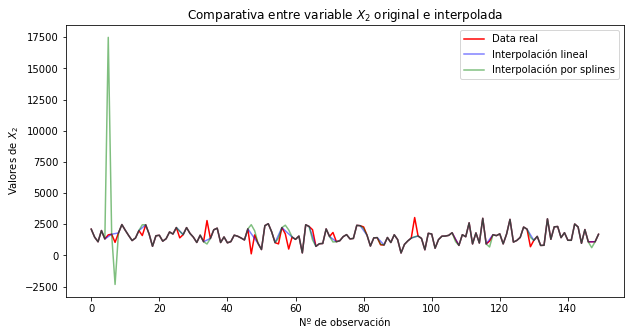

In [124]:
data["X_2"].plot(color="red")
df_linear_interp["X_2"].plot(
    figsize=(10, 5), xlabel="Nº de observación", ylabel=r"Valores de $X_2$",
    title=r"Comparativa entre variable $X_2$ original e interpolada", color="blue",
    alpha=0.5
)
df_cubic_spline_interp["X_2"].plot(
    figsize=(10, 5), xlabel="Nº de observación", ylabel=r"Valores de $X_2$",
    title=r"Comparativa entre variable $X_2$ original e interpolada", color="green",
    alpha=0.5
)
plt.legend(["Data real", "Interpolación lineal", "Interpolación por splines"]);

Vemos pues que este tipo de interpolación genera puntos muy distintos, en varios casos, en relación al caso de la interpolación mediante splines lineales. A fin de determinar cuál es mejor, podríamos determinar los errores relativos de ambos casos y quedarnos con la alternativa que genere el menor error de interpolación. Dejamos esto como ejercicio al lector.

## Comentarios finales.
Ya hemos aprendido a manipular datos conforme todo tipo de operaciones y métodos de agregación tanto en series como en DataFrames, lo que, sumado a las `ufuncs` que hemos aprendido en **Numpy**, nos permite prácticamente realizar la operación que queramos usando estructuras de datos de **Pandas**. En la próxima sección estudiaremos la indexación múltiple de series y DataFrames, considerando la incorporación de data de mayores dimensiones en estas estructuras. Veremos que todas las operaciones que hemos aprendido en esta sección se preservan tanto en series como DataFrames con más de un nivel de indexación en filas y columnas.